In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv("~/Documents/ML/dataset/spam.csv", encoding="latin-1")

In [68]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [71]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [72]:
features = ["f1", "f2", "f3"]

In [73]:
# data.columns.values[2:] = features

In [74]:
data.rename(columns={"Unnamed: 2":"feature_1", "Unnamed: 3":"feature_2","Unnamed: 4":"feature_3"})

,v1,v2,feature_1,feature_2,feature_3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<Axes: xlabel='v1', ylabel='Count'>

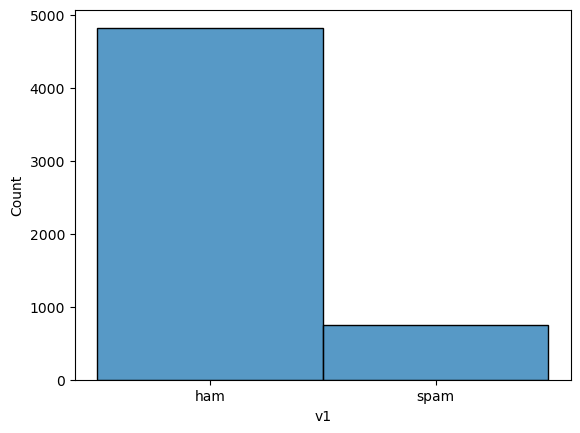

In [75]:
sns.histplot(data.v1)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

x_train, x_test = train_test_split(data, test_size=0.2, random_state=123)

X = x_train.drop("v1", axis=1)
y = x_train.v1
y = encoder.fit_transform(y)

In [77]:
from sklearn.feature_extraction import DictVectorizer

X = X.to_dict(orient="record")
dv = DictVectorizer(sparse=False)
X = pd.DataFrame(dv.fit_transform(X, y))

/tmp/ipykernel_9953/523542489.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X = X.to_dict(orient="record")


In [80]:
from sklearn.impute import SimpleImputer
# X_train = dv.transform(x_train)

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(X, y)

In [81]:

x_trainval, x_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=23)

In [82]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [83]:
from sklearn.model_selection import GridSearchCV

params = {"C": [0.1,1.0,10.0],"loss":["hinge","squared_hinge"],"penalty":["l1", "l2"],"dual":[True,False],"class_weight":[None, "balanced"]}

grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy")
grid_search.fit(x_train, y_train)

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py", line 315, in fit

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [84]:
best_params = grid_search.best_params_
best_params

{'C': 0.1,
 'class_weight': 'balanced',
 'dual': True,
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [85]:
model.set_params(C=best_params["C"], class_weight=best_params["class_weight"], dual=best_params["dual"], loss=best_params["loss"], penalty=best_params["penalty"])

prediction = model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("Accuracy: ", accuracy_score(y_test, prediction))
print("F1 Score: ", f1_score(y_test, prediction))
print("AUC-ROC: ", roc_auc_score(y_test, prediction))

Accuracy:  0.874439461883408
F1 Score:  0.25333333333333335
AUC-ROC:  0.5725190839694656
